In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1

In [15]:
Y = np.array(pd.read_csv('lecture02_kernel_methods_approximate_pdf.txt', header=None))

print(Y.shape)
print(Y)

(10000, 1)
[[0.21912524]
 [0.37159598]
 [0.66222731]
 ...
 [0.25076543]
 [0.45238561]
 [0.6745316 ]]


In [16]:
# approximate probability density function
def approximate_pdf(Y, y_points, h):
    N = Y.size
    
    results = []
    for yi in y_points:
        Nh = np.count_nonzero((Y > yi - h) & (Y <= yi + h))
        results.append(Nh / (2 * N * h))
    
    return np.array(results)

h = .05
y = np.array([0.5])
approximate_pdf(Y, y, h)

f = lambda y : approximate_pdf(Y, y, h)

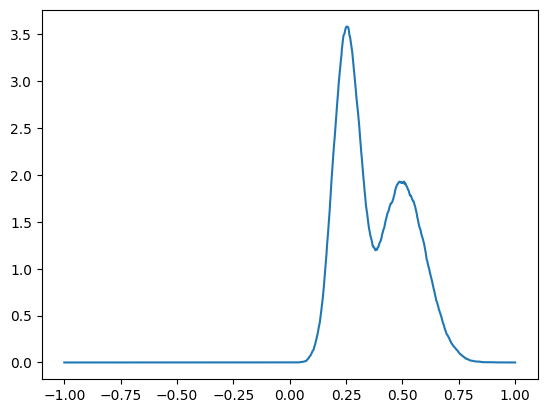

In [17]:
xs = np.linspace(-1, 1, 1000)
plt.plot(xs, f(xs))
plt.show()

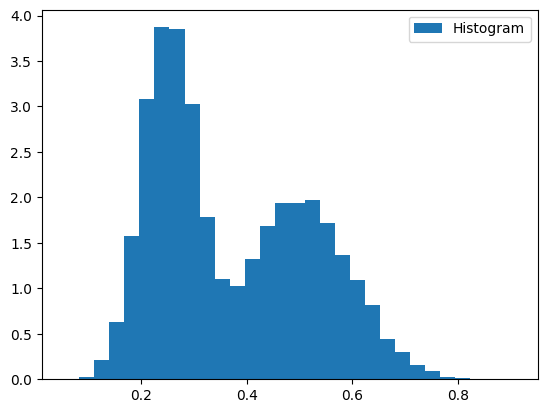

In [18]:
plt.hist(Y, bins=30, density=True, label="Histogram")
plt.legend()
plt.show()

# Exercise 2

In [19]:
data = np.array(pd.read_csv('lecture02_kernel_methods_conditional_mean.txt', header=None))
Y, Z = data[:, 0], data[:, 1]

print(Y.shape, Z.shape)

(300,) (300,)


In [20]:
k = lambda u: (1/2) if -1 < u <= 1 else 0

def approximate_conditional_expectation(Z, Y, y, h=0.01):
    return np.sum(np.array(list(map(k, (y - Y)/h))) * Z) / np.sum(np.array(list(map(k, (y - Y)/h))))


approximate_conditional_expectation(Z, Y, y = 3.2)

10.172644427996607

In [21]:
# vectorised kernel
def k(u):
    return .5 * ((-1 < u) & (u <= 1))

def approximate_conditional_expectation(Z, Y, y, h=0.01):
    return np.sum(k((y - Y) / h) * Z) / np.sum(k((y - Y) / h))

approximate_conditional_expectation(Z, Y, y = 3.2)

10.172644427996607

/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T/ipykernel_75416/2838156586.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(k((y - Y) / h) * Z) / np.sum(k((y - Y) / h))


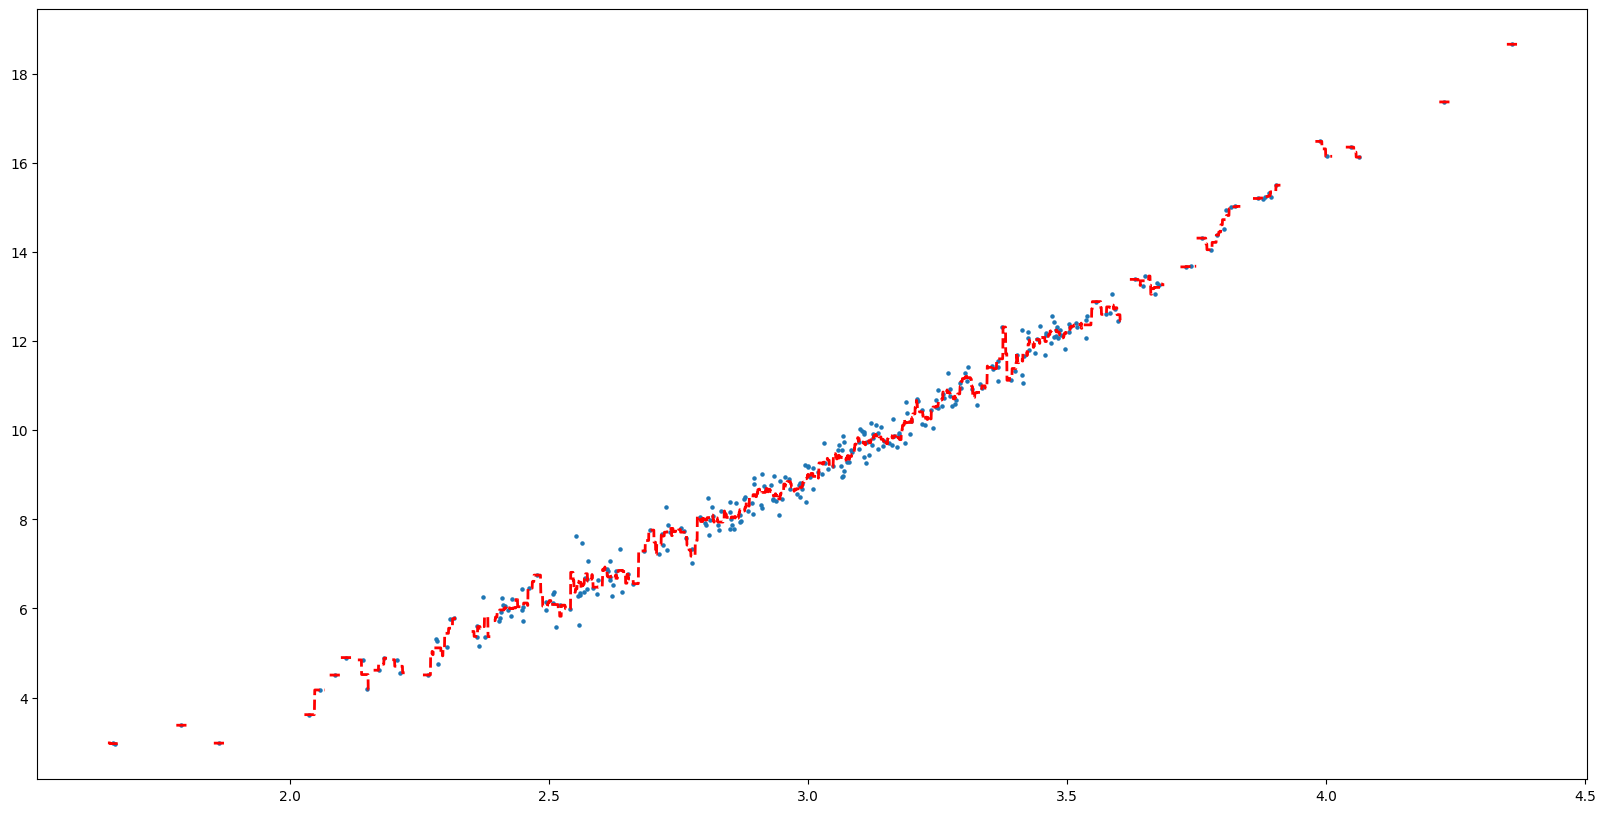

In [22]:
ys = np.linspace(1, 5, 10000)
plt.figure(figsize=(20, 10))
plt.scatter(Y, Z, s=5)
plt.plot(ys, np.array(list(map(lambda y: approximate_conditional_expectation(Z, Y, y), ys))), 'r--', linewidth=2)
plt.show()

In [23]:
# Gaussian kernel
k_gaussian = lambda u : (1/(h*np.sqrt(2*np.pi)))*np.exp(-(u**2/2*h**2))

def approximate_conditional_expectation(Z, Y, y, h=0.003):
    return np.sum(np.array(list(map(k_gaussian, (y - Y)/h))) * Z) / np.sum(np.array(list(map(k_gaussian, (y - Y)/h))))

approximate_conditional_expectation(Z, Y, y = 3.2)

10.197851612240362

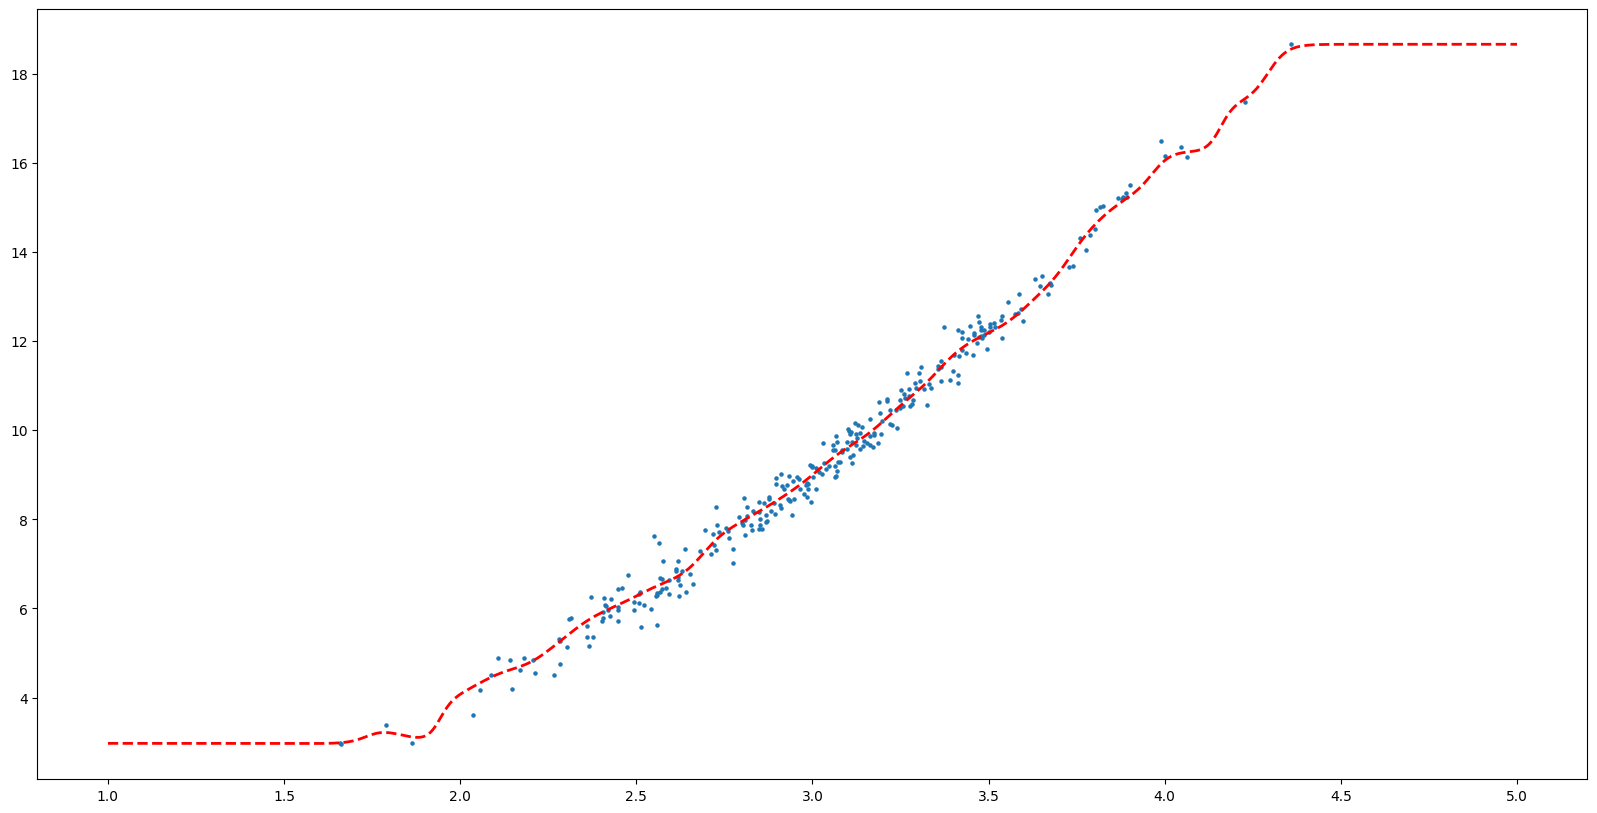

In [24]:
ys = np.linspace(1, 5, 10000)
plt.figure(figsize=(20, 10))
plt.scatter(Y, Z, s=5)
plt.plot(ys, np.array(list(map(lambda y: approximate_conditional_expectation(Z, Y, y), ys))), 'r--', linewidth=2)
plt.show()

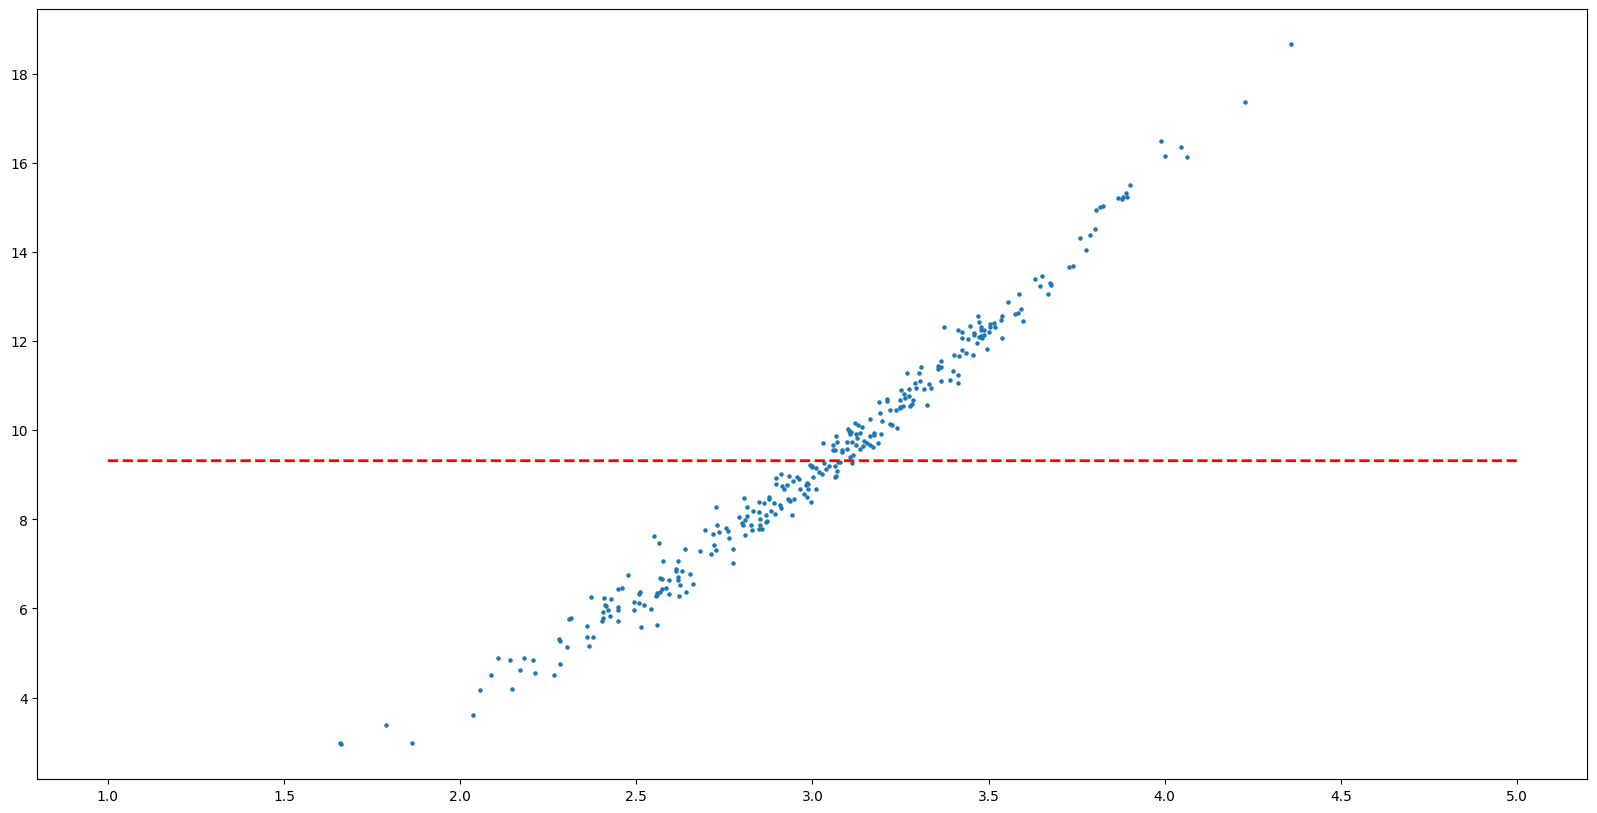

In [25]:
ys = np.linspace(1, 5, 10000)
plt.figure(figsize=(20, 10))
plt.scatter(Y, Z, s=5)
plt.plot(ys, np.array(list(map(lambda y: approximate_conditional_expectation(Z, Y, y, h=10), ys))), 'r--', linewidth=2)
plt.show()

/var/folders/nb/bcl7qtp16rv9lpgrryc9q4c00000gn/T/ipykernel_75416/3755471812.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(np.array(list(map(k_gaussian, (y - Y)/h))) * Z) / np.sum(np.array(list(map(k_gaussian, (y - Y)/h))))


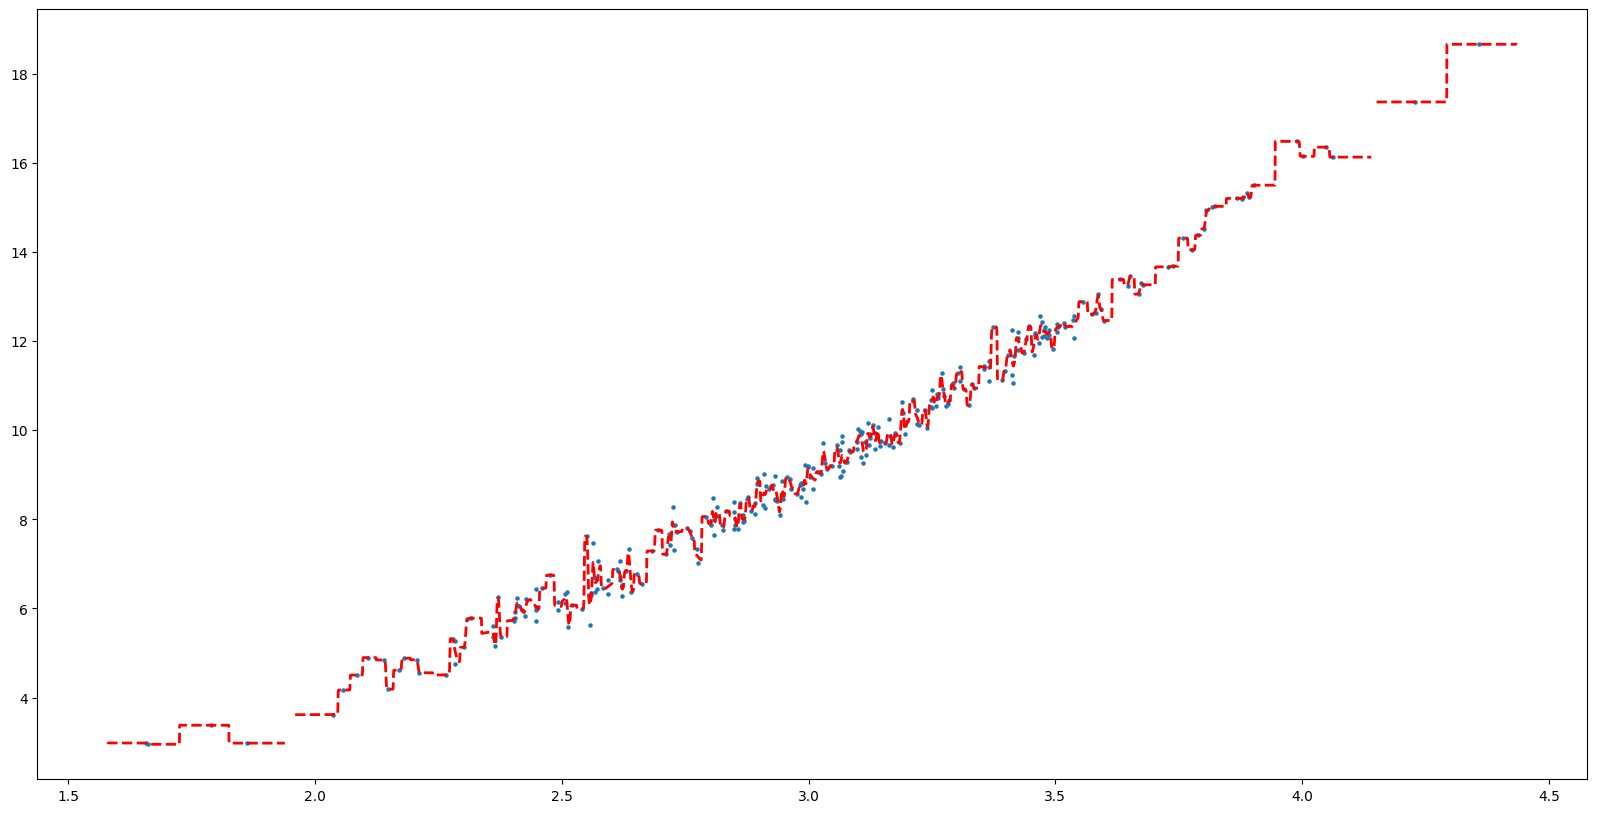

In [26]:
ys = np.linspace(1, 5, 10000)
plt.figure(figsize=(20, 10))
plt.scatter(Y, Z, s=5)
plt.plot(ys, np.array(list(map(lambda y: approximate_conditional_expectation(Z, Y, y, h=0.0001), ys))), 'r--', linewidth=2)
plt.show()

- If h is large the variance is small but the bias is large.
- If h is small the variance is large but the bias is small. 

Nearest neighbor: “I’ll take the value of my closest friend.”

Local constant: “I’ll ask all my neighbors, but give more attention to those who live closest.”

Local polynomial: “I’ll not only ask my neighbors, but also fit a small line/parabola through them, so I account for slopes/curvature locally.”